# EDA

## Libraries

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from cnr_methods import get_simplified_data

sns.set_style('darkgrid')

## Read Data

In [12]:
full_data = get_simplified_data()
y_train = pd.read_csv('Y_train.csv')

## Univariate Analysis

Let's start by first checking all the features time series (Train + Test)

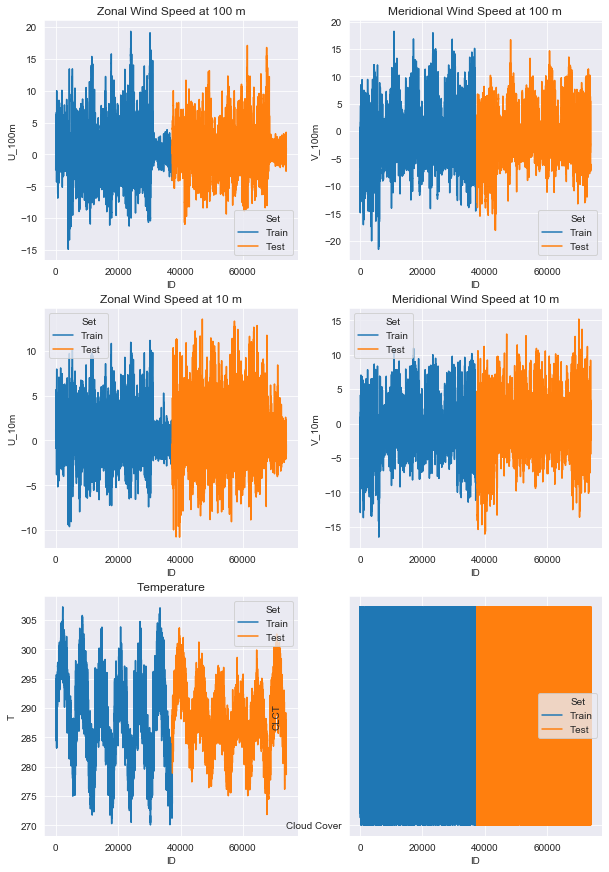

In [13]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
sns.lineplot(full_data['ID'],full_data['U_100m'],hue=full_data['Set'])
plt.title('Zonal Wind Speed at 100 m')
plt.subplot(3,2,2)
sns.lineplot(full_data['ID'],full_data['V_100m'],hue=full_data['Set'])
plt.title('Meridional Wind Speed at 100 m')
plt.subplot(3,2,3)
sns.lineplot(full_data['ID'],full_data['U_10m'],hue=full_data['Set'])
plt.title('Zonal Wind Speed at 10 m')
plt.subplot(3,2,4)
sns.lineplot(full_data['ID'],full_data['V_10m'],hue=full_data['Set'])
plt.title('Meridional Wind Speed at 10 m')
plt.subplot(3,2,5)
sns.lineplot(full_data['ID'],full_data['T'],hue=full_data['Set'])
plt.title('Temperature')
plt.subplot(3,2,6)
sns.lineplot(full_data['ID'],full_data['CLCT'],hue=full_data['Set'])
plt.plot('Cloud Cover')

Now let's check the train and test data overlapped.

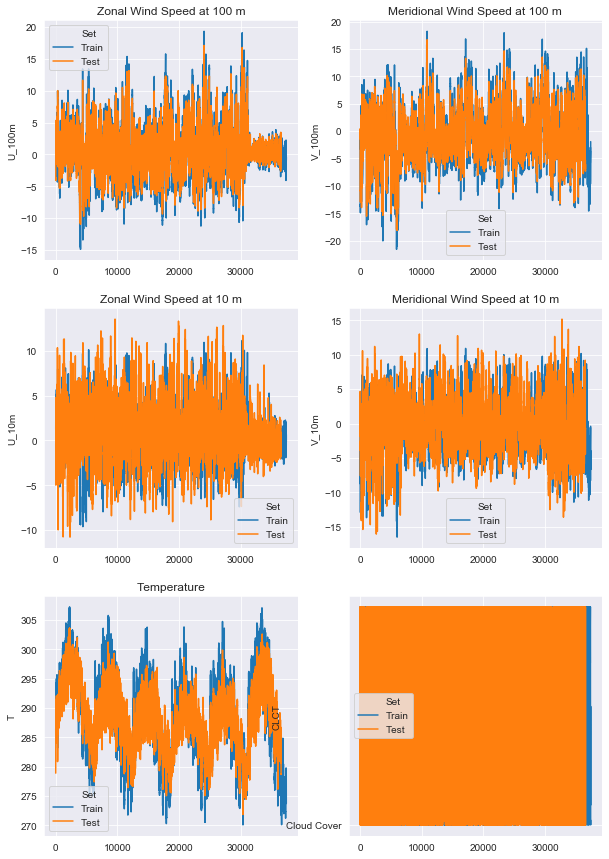

In [14]:
plt.figure(figsize=(10,15))
plt.subplot(3,2,1)
sns.lineplot(full_data.index,full_data['U_100m'],hue=full_data['Set'])
plt.title('Zonal Wind Speed at 100 m')
plt.subplot(3,2,2)
sns.lineplot(full_data.index,full_data['V_100m'],hue=full_data['Set'])
plt.title('Meridional Wind Speed at 100 m')
plt.subplot(3,2,3)
sns.lineplot(full_data.index,full_data['U_10m'],hue=full_data['Set'])
plt.title('Zonal Wind Speed at 10 m')
plt.subplot(3,2,4)
sns.lineplot(full_data.index,full_data['V_10m'],hue=full_data['Set'])
plt.title('Meridional Wind Speed at 10 m')
plt.subplot(3,2,5)
sns.lineplot(full_data.index,full_data['T'],hue=full_data['Set'])
plt.title('Temperature')
plt.subplot(3,2,6)
sns.lineplot(full_data.index,full_data['CLCT'],hue=full_data['Set'])
plt.title('Cloud Cover')

On these graphics, it's possible to see the data on Train and Test are quite similar, which is a very good sign since it means that our model will try to predict data that is similar to the one it used to be trained.

Now, let`s do a little check on the Target Variable.

Text(0.5, 1.0, 'Energy Production')

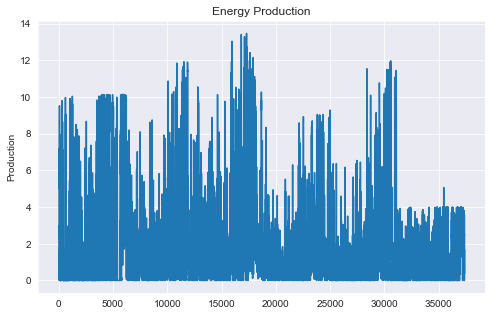

In [15]:
plt.figure(figsize=(8,5))
sns.lineplot(x=full_data[full_data['Set']=='Train'].index,y=y_train['Production'])
plt.title('Energy Production')

Text(0.5, 1.0, 'Energy Production Distribution')

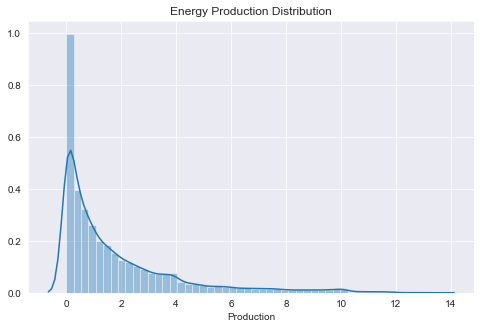

In [16]:
plt.figure(figsize=(8,5))
sns.distplot(y_train['Production'])
plt.title('Energy Production Distribution')

## Multivariate Analysis

Now, let`s try to find patterns and relations between features.

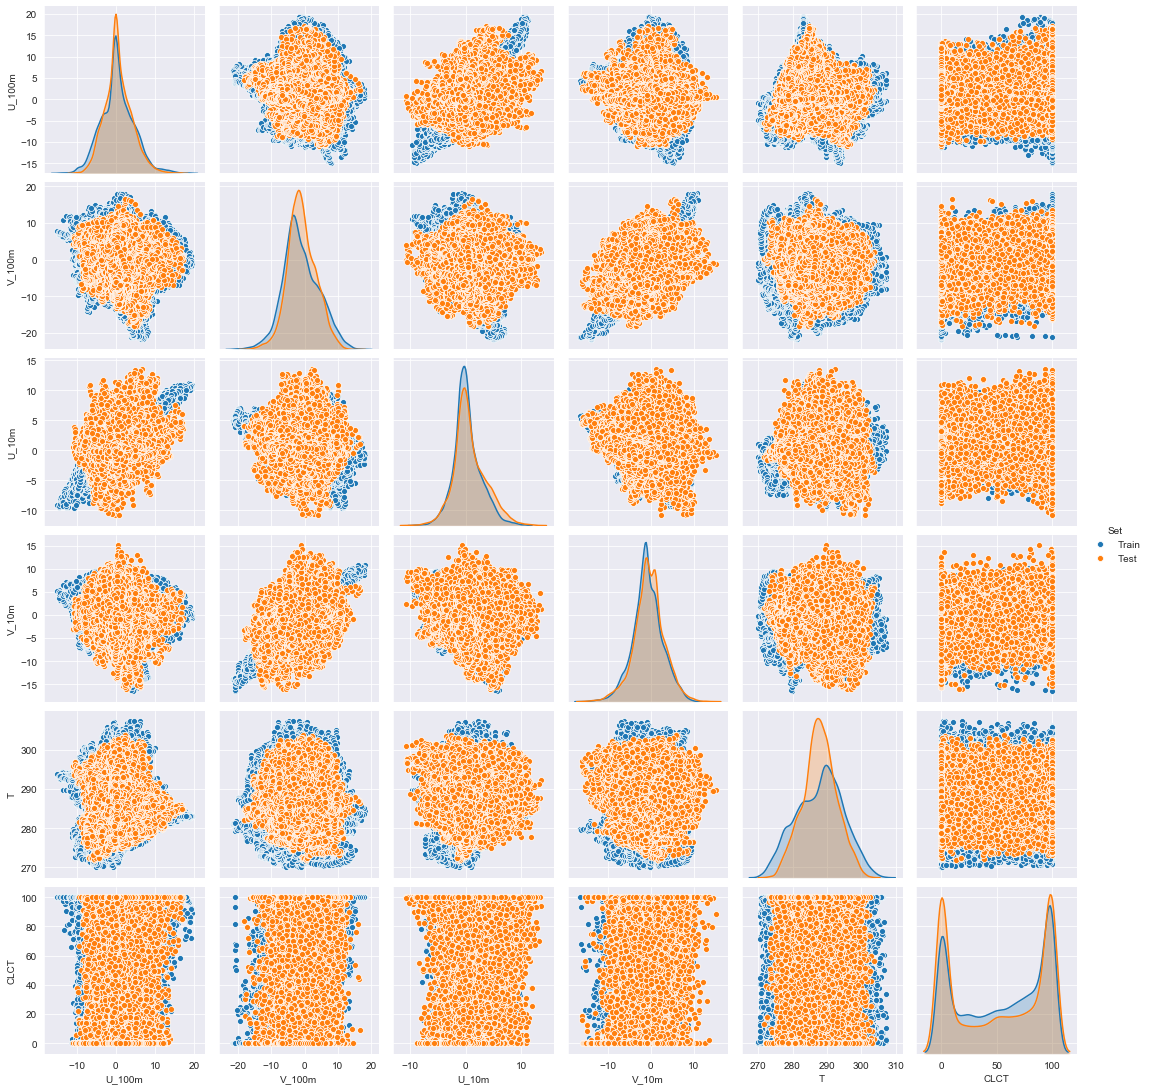

In [17]:
sns.pairplot(full_data[['U_100m','V_100m','U_10m','V_10m','T','CLCT','Set']],hue='Set')

Text(0.5, 1, 'Features Correlation Heatmap')

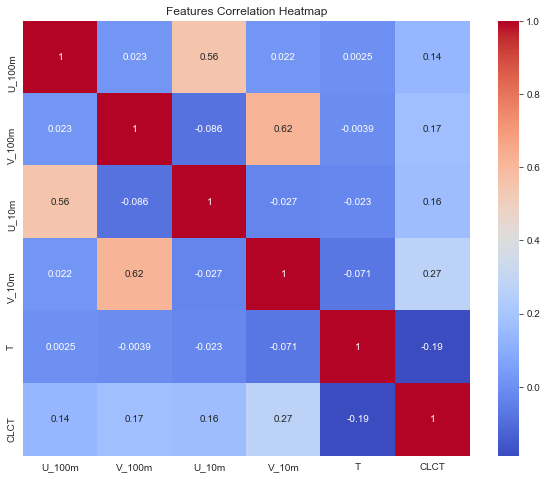

In [25]:
corr = full_data[['U_100m','V_100m','U_10m','V_10m','T','CLCT','Set']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.title('Features Correlation Heatmap')

It`s possible to se some kind of positive correlations between the features pairs:

* U_100m and U_10m
* V_100m and V_10m
* V_10m and CLCT (Quite Small)

Let`s check the first two pairs.

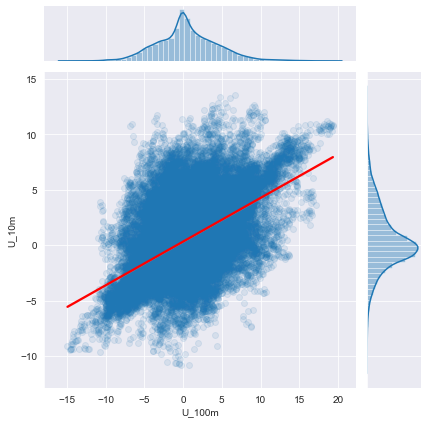

In [19]:
sns.jointplot(x='U_100m',y='U_10m',data=full_data,kind="reg",joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

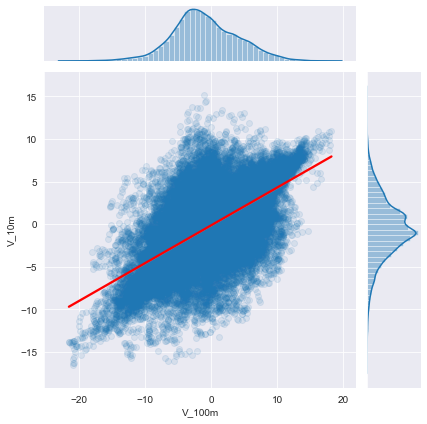

In [20]:
sns.jointplot(x='V_100m',y='V_10m',data=full_data,kind="reg",joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

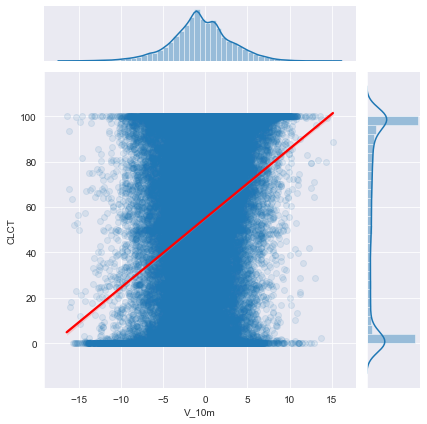

In [21]:
sns.jointplot(x='V_10m',y='CLCT',data=full_data,kind="reg",joint_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})

As it's possible to see, these features have positive correlations between themselves, and this can be used later for Feature Generation.

### Correlations between Train Data and Target

Now, let`s check if we can find any correlation between features and target. For this task, only Train Set will be used.

In [22]:
train_data = pd.concat([full_data[full_data['Set']=='Train'],y_train['Production']],axis=1)

Text(0.5, 1, 'Features and Target Correlation Heatmap')

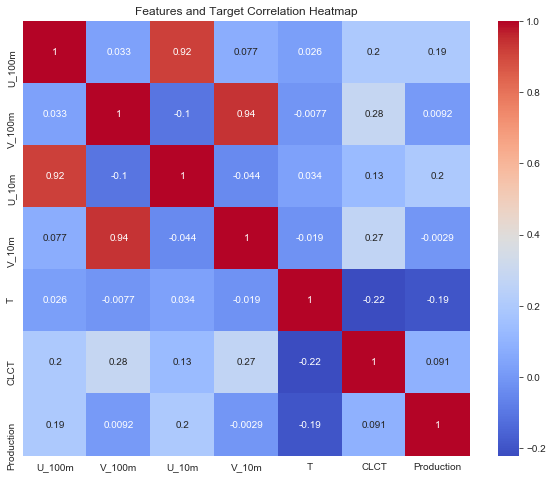

In [26]:
corr = train_data[['U_100m','V_100m','U_10m','V_10m','T','CLCT','Production']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Features and Target Correlation Heatmap')

The more prominent correlations with the target involve the features U_100m and U_10m. This information can sugest that in most cases, the Wind Farms considered on this problem are headed towards latitutinal orientations (East or West).

### Analysis by Wind Farm

Finally, since we have more than One Wind Farm considered on the data, let`s analyze some variables behaviours by Wind Farm. For this task, we will use only Train Set.

Text(0.5, 1.0, 'Energy Production by Wind Farm')

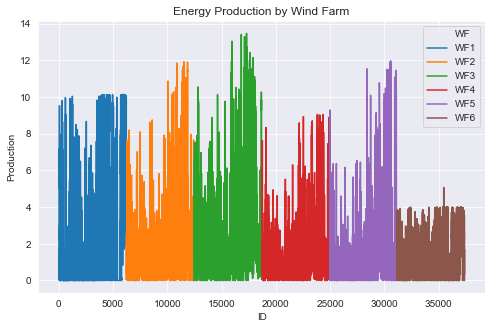

In [38]:
plt.figure(figsize=(8,5))
sns.lineplot(x='ID',y='Production',data=train_data,hue='WF')
plt.title('Energy Production by Wind Farm')

<Figure size 720x720 with 0 Axes>

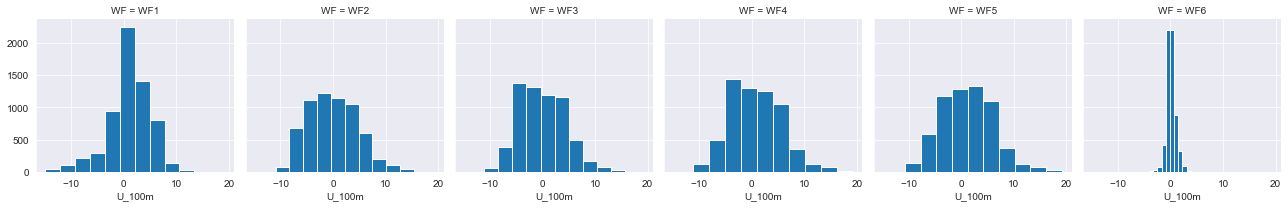

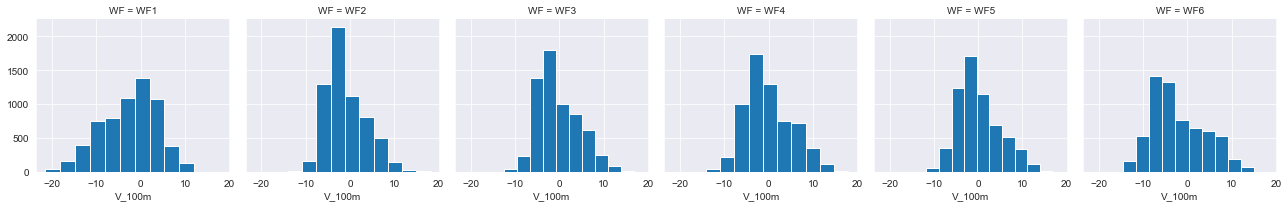

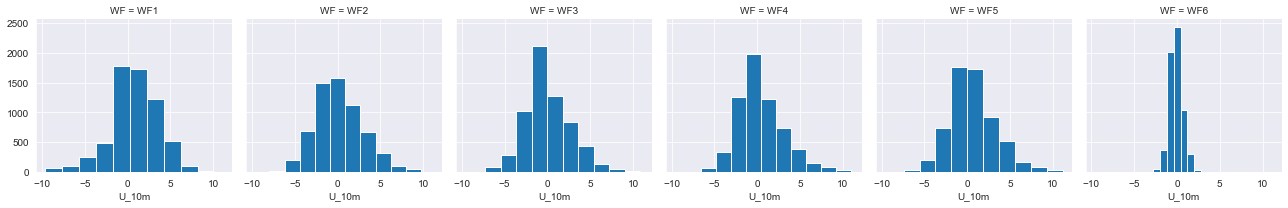

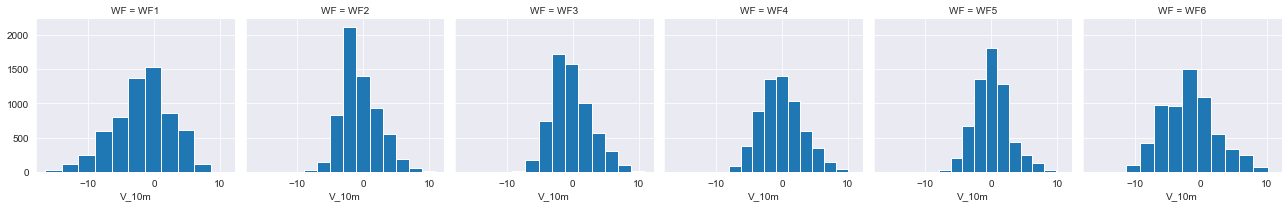

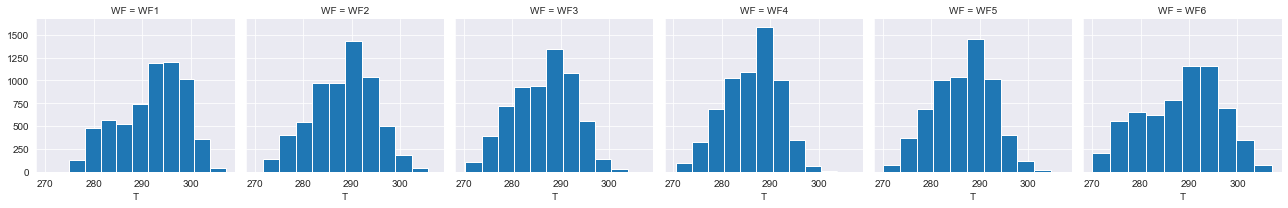

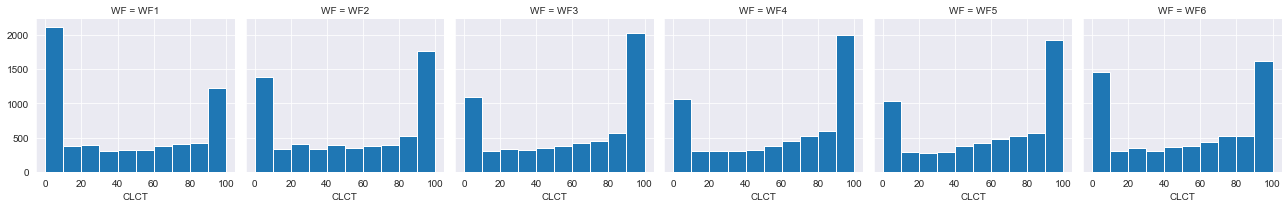

In [48]:
plt.figure(figsize=(10,10))
g1 = sns.FacetGrid(train_data,col='WF')
g1.map(plt.hist,'U_100m')

g2 = sns.FacetGrid(train_data,col='WF')
g2.map(plt.hist,'V_100m')

g3 = sns.FacetGrid(train_data,col='WF')
g3.map(plt.hist,'U_10m')

g4 = sns.FacetGrid(train_data,col='WF')
g4.map(plt.hist,'V_10m')

g5 = sns.FacetGrid(train_data,col='WF')
g5.map(plt.hist,'T')

g6 = sns.FacetGrid(train_data,col='WF')
g6.map(plt.hist,'CLCT')

It's clear that each Wind Farm have it's own characteristics, but we can get some general insights from the graphics:

* Wind Speeds are generally Values between 10 and -10;
* Wind Farm 6 has low values for Zonal Wind, which may indicate that it's turbines are oriented towards Meridional Directions (North or South);
* As a more stable variable, Temperature is similar for all Wind Farms;
* Except from Windf Farm 1, the weather generally has clouds for the others Wind Farms;